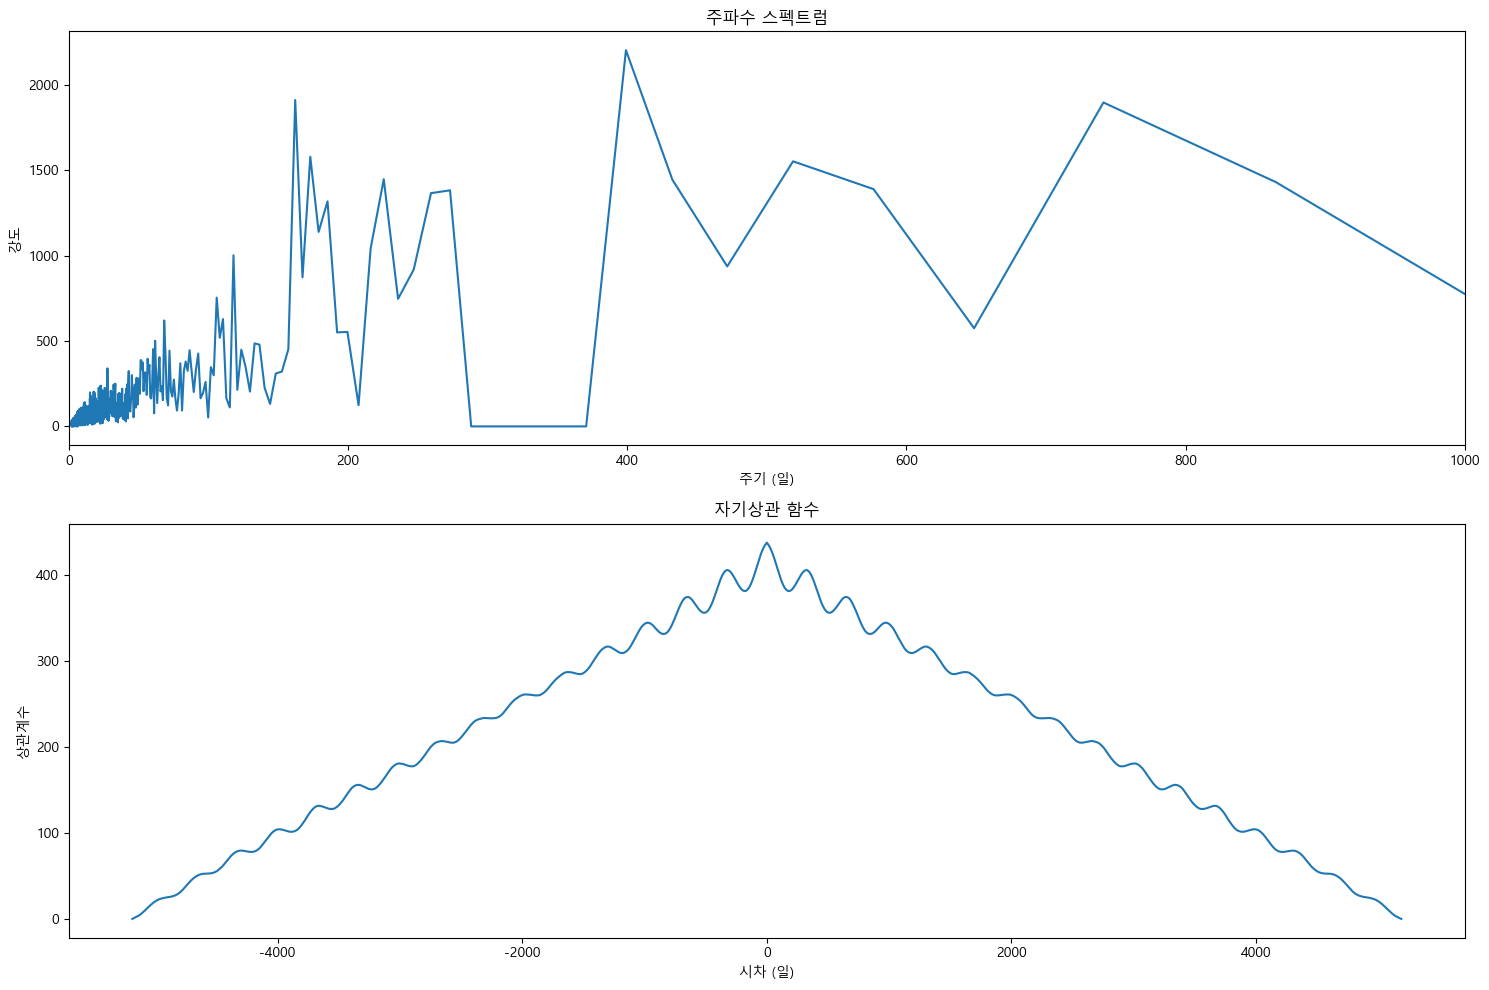


주요 주기성:
주기: 345.9일 (강도: 8985)
주기: 305.2일 (강도: 8367)
주기: 324.2일 (강도: 7050)
주기: 370.6일 (강도: 4398)
주기: 288.2일 (강도: 2682)


In [1]:
import pandas as pd
import numpy as np
from scipy import fft, signal
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('data/마라도_수온_2008부터.csv', encoding='utf-8')
df['일시'] = pd.to_datetime(df['일시'])
df = df.sort_values('일시')  # 날짜순 정렬

# 결측치 처리
temp_data = df['평균수온(섭씨)'].interpolate()  # 선형 보간

# FFT 분석
fft_values = fft.fft(temp_data)
frequencies = fft.fftfreq(len(temp_data))
positive_frequencies = frequencies[1:len(frequencies)//2]
magnitudes = np.abs(fft_values)[1:len(frequencies)//2]

# 주요 주기 찾기
main_periods = []
for i in range(5):  # 상위 5개 주기 찾기
    idx = np.argmax(magnitudes)
    period_days = abs(1/positive_frequencies[idx])
    magnitude = magnitudes[idx]
    main_periods.append((period_days, magnitude))
    magnitudes[idx] = 0  # найденный пик обнуляем

# 자기상관분석
autocorr = signal.correlate(temp_data, temp_data, mode='full') / len(temp_data)
lags = np.arange(-(len(temp_data)-1), len(temp_data))

# 결과 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# FFT 스펙트럼
ax1.plot(1/positive_frequencies, magnitudes)
ax1.set_title('주파수 스펙트럼')
ax1.set_xlabel('주기 (일)')
ax1.set_ylabel('강도')
ax1.set_xlim(0, 1000)  # 1000일까지만 표시

# 자기상관
ax2.plot(lags, autocorr)
ax2.set_title('자기상관 함수')
ax2.set_xlabel('시차 (일)')
ax2.set_ylabel('상관계수')

plt.tight_layout()
plt.show()

# 주요 주기 출력
print("\n주요 주기성:")
for period, magnitude in main_periods:
    if period < 1000:  # 1000일 미만의 주기만 표시
        print(f"주기: {period:.1f}일 (강도: {magnitude:.0f})")

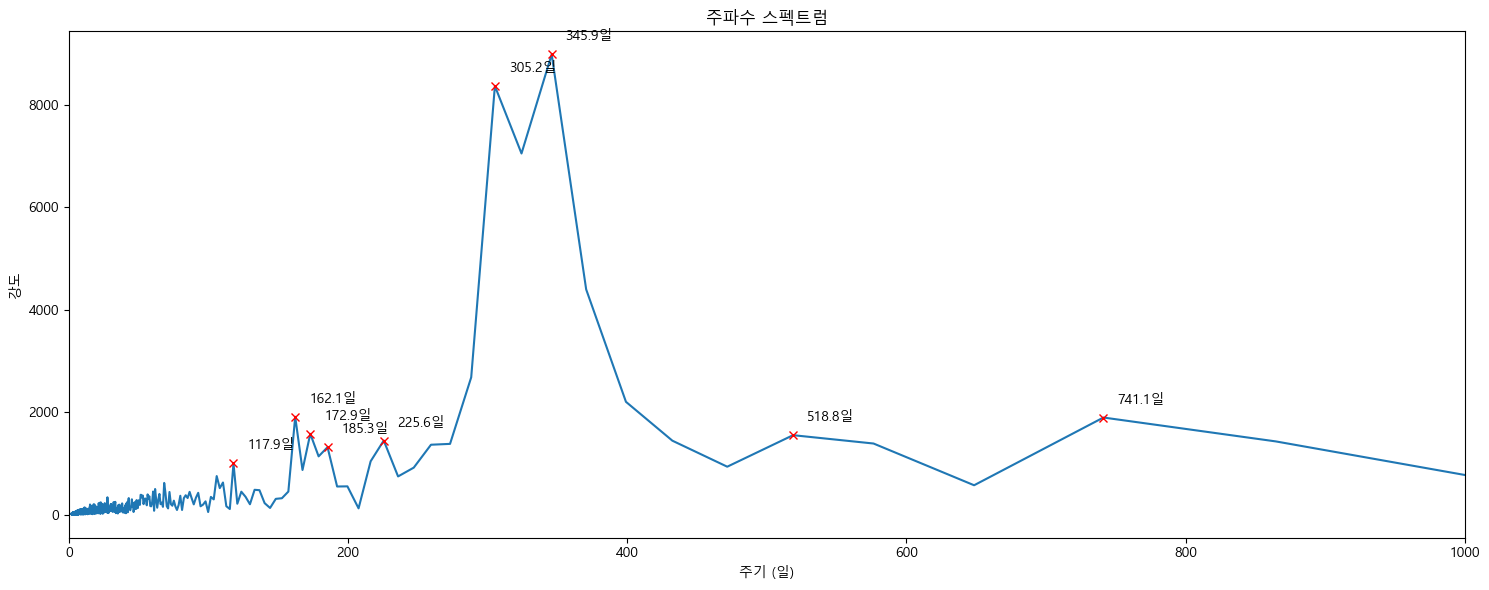


주요 피크들:
주기: 741.1일 (강도: 1897)
주기: 518.8일 (강도: 1552)
주기: 345.9일 (강도: 8985)
주기: 305.2일 (강도: 8367)
주기: 225.6일 (강도: 1447)
주기: 185.3일 (강도: 1318)
주기: 172.9일 (강도: 1579)
주기: 162.1일 (강도: 1911)
주기: 117.9일 (강도: 1002)


In [2]:
import pandas as pd
import numpy as np
from scipy import fft, signal
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('data/마라도_수온_2008부터.csv', encoding='utf-8')
df['일시'] = pd.to_datetime(df['일시'])
df = df.sort_values('일시')

# 결측치 처리
temp_data = df['평균수온(섭씨)'].interpolate()

# FFT 분석
fft_values = fft.fft(temp_data)
frequencies = fft.fftfreq(len(temp_data))
positive_frequencies = frequencies[1:len(frequencies)//2]
magnitudes = np.abs(fft_values)[1:len(frequencies)//2]

# 주기로 변환 (x축을 주기로 변환)
periods = 1/positive_frequencies

# 피크 찾기
peaks, _ = signal.find_peaks(magnitudes, height=1000)  # height 파라미터로 일정 크기 이상의 피크만 찾기

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(periods, magnitudes)
plt.plot(periods[peaks], magnitudes[peaks], "x", color='red')  # 피크 위치 표시

# 각 피크 위치에 텍스트로 주기 표시
for i, peak in enumerate(peaks):
    plt.annotate(f'{periods[peak]:.1f}일',
                xy=(periods[peak], magnitudes[peak]),
                xytext=(10, 10),
                textcoords='offset points')

plt.title('주파수 스펙트럼')
plt.xlabel('주기 (일)')
plt.ylabel('강도')
plt.xlim(0, 1000)  # 1000일까지만 표시

plt.tight_layout()
plt.show()

# 피크 위치의 주기와 강도 출력
print("\n주요 피크들:")
for peak in peaks:
    print(f"주기: {periods[peak]:.1f}일 (강도: {magnitudes[peak]:.0f})")


가중 평균 주기: 325.9일
가중 표준편차: 141.8일

각 피크의 기여도:
주기 741.1일: 6.8%
주기 518.8일: 5.5%
주기 345.9일: 32.0%
주기 305.2일: 29.8%
주기 225.6일: 5.2%
주기 185.3일: 4.7%
주기 172.9일: 5.6%
주기 162.1일: 6.8%
주기 117.9일: 3.6%


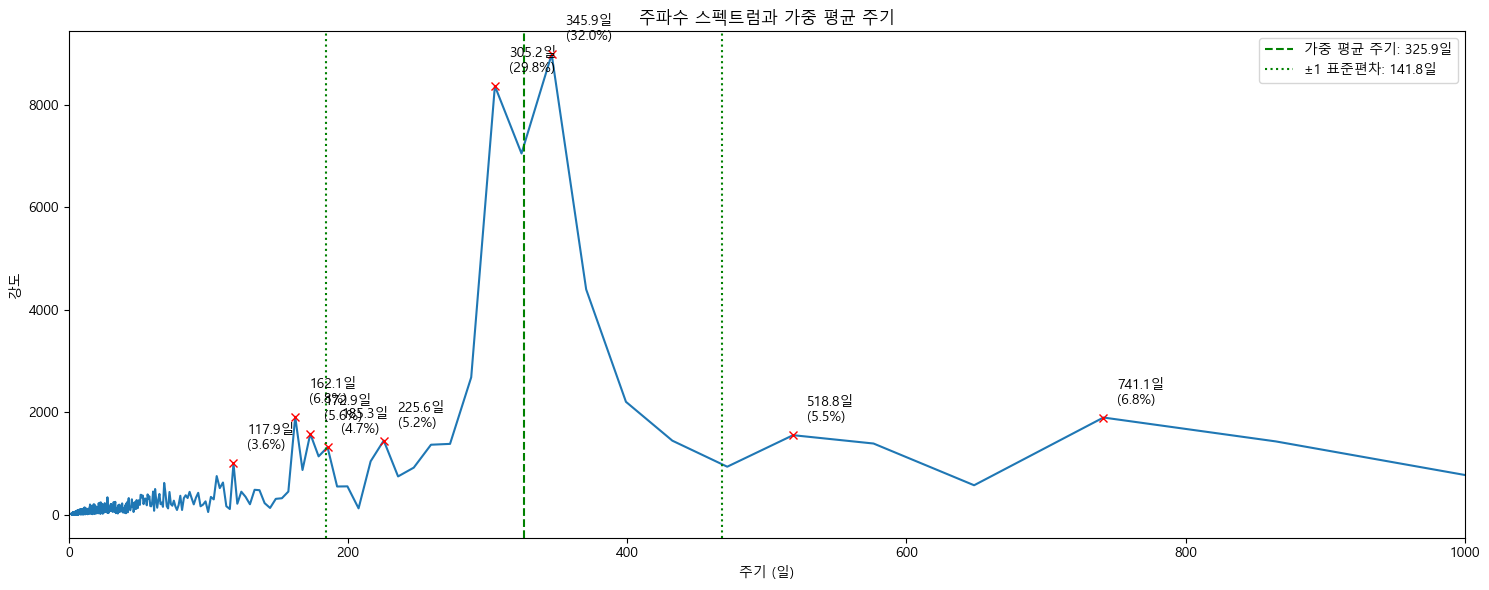

In [3]:
import pandas as pd
import numpy as np
from scipy import fft, signal
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('data/마라도_수온_2008부터.csv', encoding='utf-8')
df['일시'] = pd.to_datetime(df['일시'])
df = df.sort_values('일시')

# 결측치 처리
temp_data = df['평균수온(섭씨)'].interpolate()

# FFT 분석
fft_values = fft.fft(temp_data)
frequencies = fft.fftfreq(len(temp_data))
positive_frequencies = frequencies[1:len(frequencies)//2]
magnitudes = np.abs(fft_values)[1:len(frequencies)//2]
periods = 1/positive_frequencies

# 피크 찾기
peaks, properties = signal.find_peaks(magnitudes, height=1000)

# 피크들의 주기와 강도
peak_periods = periods[peaks]
peak_magnitudes = magnitudes[peaks]

# 가중 평균 주기 계산
weighted_period = np.average(peak_periods, weights=peak_magnitudes)
weighted_std = np.sqrt(np.average((peak_periods - weighted_period)**2, weights=peak_magnitudes))

print(f"\n가중 평균 주기: {weighted_period:.1f}일")
print(f"가중 표준편차: {weighted_std:.1f}일")

# 각 피크의 기여도(%) 계산
total_magnitude = np.sum(peak_magnitudes)
contributions = (peak_magnitudes / total_magnitude) * 100

print("\n각 피크의 기여도:")
for period, contrib in zip(peak_periods, contributions):
    print(f"주기 {period:.1f}일: {contrib:.1f}%")

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(periods, magnitudes)
plt.plot(periods[peaks], magnitudes[peaks], "x", color='red')

# 가중 평균 주기 표시
plt.axvline(x=weighted_period, color='g', linestyle='--', 
            label=f'가중 평균 주기: {weighted_period:.1f}일')
plt.axvline(x=weighted_period-weighted_std, color='g', linestyle=':',
            label=f'±1 표준편차: {weighted_std:.1f}일')
plt.axvline(x=weighted_period+weighted_std, color='g', linestyle=':')

for period, magnitude, contrib in zip(peak_periods, peak_magnitudes, contributions):
    plt.annotate(f'{period:.1f}일\n({contrib:.1f}%)',
                xy=(period, magnitude),
                xytext=(10, 10),
                textcoords='offset points')

plt.title('주파수 스펙트럼과 가중 평균 주기')
plt.xlabel('주기 (일)')
plt.ylabel('강도')
plt.xlim(0, 1000)
plt.legend()

plt.tight_layout()
plt.show()


2008-2013 기간의 주요 주기:
주기: 346.0일 (강도: 3739)

2014-2019 기간의 주요 주기:
주기: 345.8일 (강도: 5313)

2020-2024 기간의 주요 주기:
주기: 345.8일 (강도: 4342)


c:\anything\hb11\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


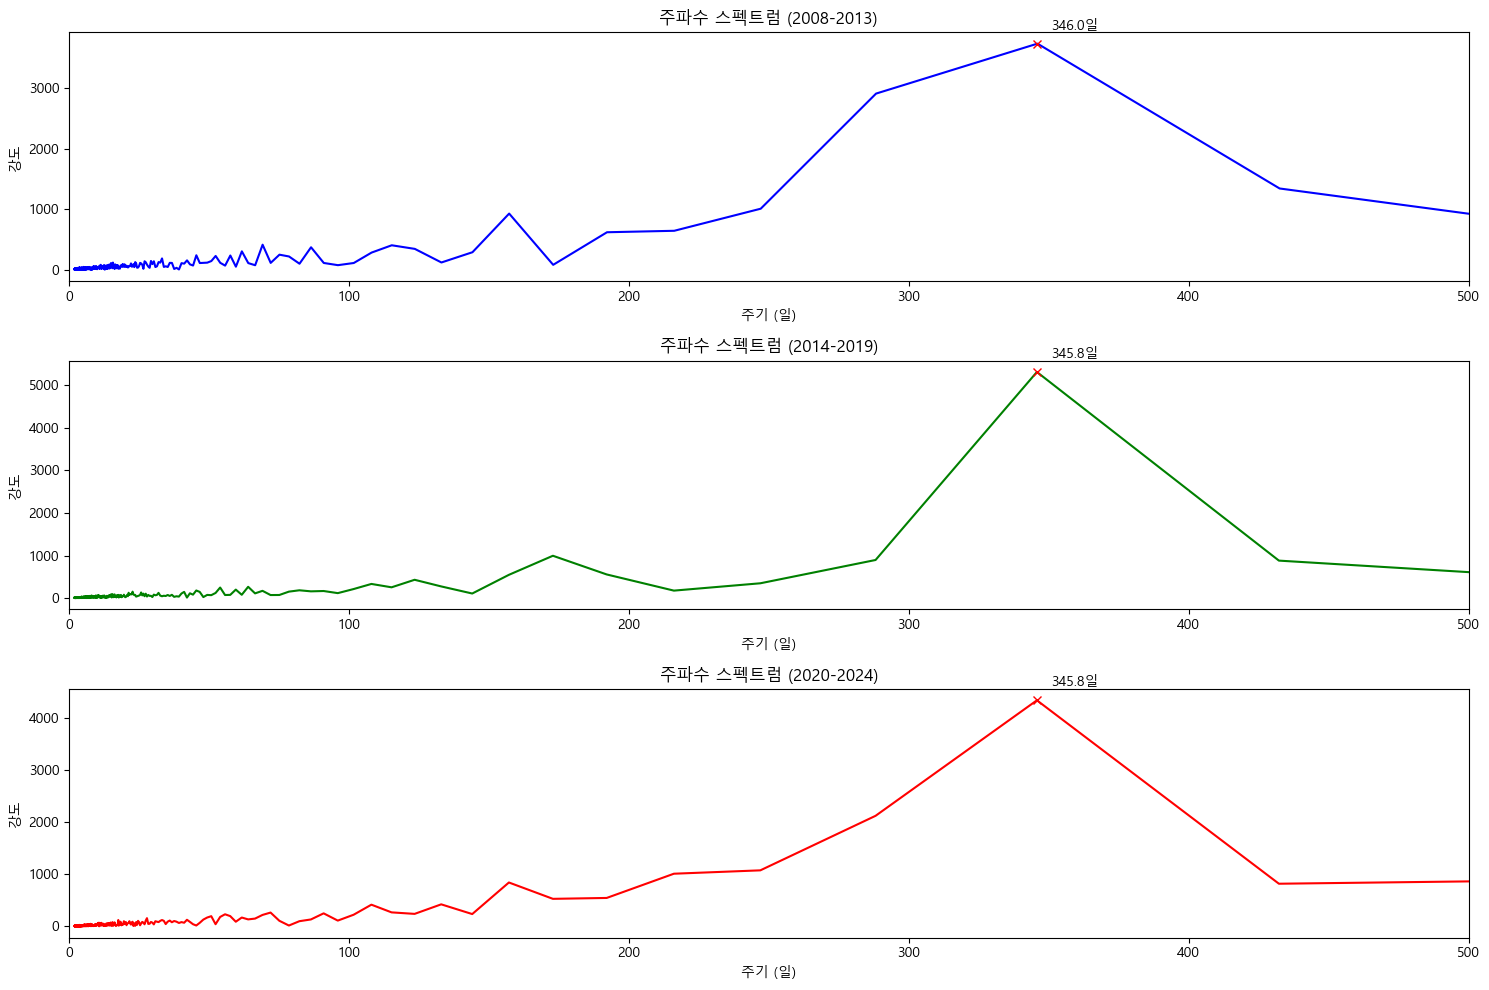


2008-2013 기간의 연도별 최대 수온 발생일:
2008년: 11월 15일 (22.8°C)
2009년: 08월 21일 (28.4°C)
2010년: 08월 23일 (30.2°C)
2011년: 07월 30일 (29.1°C)
2012년: 07월 31일 (29.9°C)
2013년: 08월 20일 (30.7°C)
2014년: 09월 10일 (27.1°C)

2014-2019 기간의 연도별 최대 수온 발생일:
2014년: 11월 12일 (20.7°C)
2015년: 08월 09일 (29.1°C)
2016년: 08월 13일 (31.4°C)
2017년: 08월 05일 (30.9°C)
2018년: 08월 05일 (29.1°C)
2019년: 08월 02일 (28.8°C)

2020-2024 기간의 연도별 최대 수온 발생일:
2019년: 10월 05일 (25.6°C)
2020년: 08월 23일 (30.0°C)
2021년: 08월 08일 (28.8°C)
2022년: 08월 07일 (30.0°C)
2023년: 08월 20일 (29.7°C)
2024년: 08월 10일 (32.1°C)
2025년: 01월 02일 (17.1°C)


In [4]:
import pandas as pd
import numpy as np
from scipy import fft, signal
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('data/마라도_수온_2008부터.csv', encoding='utf-8')
df['일시'] = pd.to_datetime(df['일시'])
df = df.sort_values('일시')

# 데이터를 3개 구간으로 나누기
period_splits = np.array_split(df, 3)

# 각 구간별 FFT 분석
plt.figure(figsize=(15, 10))

colors = ['blue', 'green', 'red']
labels = ['2008-2013', '2014-2019', '2020-2024']

for idx, period_data in enumerate(period_splits):
    # 결측치 처리
    temp_data = period_data['평균수온(섭씨)'].interpolate()
    
    # FFT 분석
    fft_values = fft.fft(temp_data)
    frequencies = fft.fftfreq(len(temp_data))
    positive_frequencies = frequencies[1:len(frequencies)//2]
    magnitudes = np.abs(fft_values)[1:len(frequencies)//2]
    periods = 1/positive_frequencies
    
    # 피크 찾기
    peaks, _ = signal.find_peaks(magnitudes, height=1000)
    
    # 서브플롯 생성
    plt.subplot(3, 1, idx+1)
    plt.plot(periods, magnitudes, color=colors[idx])
    plt.plot(periods[peaks], magnitudes[peaks], "x", color='red')
    
    # 주요 피크에 레이블 표시
    for peak in peaks:
        if periods[peak] < 1000:  # 1000일 미만의 주기만 표시
            plt.annotate(f'{periods[peak]:.1f}일',
                        xy=(periods[peak], magnitudes[peak]),
                        xytext=(10, 10),
                        textcoords='offset points')
    
    plt.title(f'주파수 스펙트럼 ({labels[idx]})')
    plt.xlabel('주기 (일)')
    plt.ylabel('강도')
    plt.xlim(0, 500)  # 500일까지만 표시
    
    # 주요 피크 출력
    print(f"\n{labels[idx]} 기간의 주요 주기:")
    for peak in peaks:
        if periods[peak] < 500:
            print(f"주기: {periods[peak]:.1f}일 (강도: {magnitudes[peak]:.0f})")

plt.tight_layout()
plt.show()

# 각 구간의 최대 수온 발생 시점 분석
for idx, period_data in enumerate(period_splits):
    yearly_max = period_data.groupby(period_data['일시'].dt.year)['평균수온(섭씨)'].agg(
        ['max', 'idxmax']
    )
    print(f"\n{labels[idx]} 기간의 연도별 최대 수온 발생일:")
    for year, row in yearly_max.iterrows():
        max_date = period_data.loc[row['idxmax'], '일시']
        print(f"{year}년: {max_date.strftime('%m월 %d일')} ({row['max']:.1f}°C)")


연도별 주기 시작점:

2008년:
  최저 수온 발생일: 12월 31일 (17.4°C)

2009년:
  최저 수온 발생일: 12월 31일 (17.0°C)

2010년:
  최저 수온 발생일: 03월 30일 (14.4°C)
  최대 상승 시점: 05월 18일 (변화율: 0.329°C/일)

2011년:
  최저 수온 발생일: 03월 23일 (13.7°C)
  최대 상승 시점: 05월 29일 (변화율: 0.500°C/일)

2012년:
  최저 수온 발생일: 03월 24일 (14.4°C)
  최대 상승 시점: 05월 05일 (변화율: 0.329°C/일)

2013년:
  최저 수온 발생일: 02월 23일 (13.2°C)
  최대 상승 시점: 05월 22일 (변화율: 0.514°C/일)

2014년:
  최저 수온 발생일: 03월 27일 (14.8°C)
  최대 상승 시점: 05월 28일 (변화율: 0.271°C/일)

2015년:
  최저 수온 발생일: 03월 29일 (11.6°C)
  최대 상승 시점: 05월 03일 (변화율: 0.229°C/일)

2016년:
  최저 수온 발생일: 03월 21일 (14.2°C)
  최대 상승 시점: 05월 11일 (변화율: 0.229°C/일)

2017년:
  최저 수온 발생일: 04월 15일 (13.8°C)
  최대 상승 시점: 05월 20일 (변화율: 0.314°C/일)

2018년:
  최저 수온 발생일: 02월 28일 (14.0°C)
  최대 상승 시점: 05월 30일 (변화율: 0.343°C/일)

2019년:
  최저 수온 발생일: 02월 28일 (15.0°C)
  최대 상승 시점: 05월 13일 (변화율: 0.243°C/일)

2020년:
  최저 수온 발생일: 03월 20일 (15.1°C)
  최대 상승 시점: 05월 23일 (변화율: 0.214°C/일)

2021년:
  최저 수온 발생일: 03월 04일 (15.2°C)
  최대 상승 시점: 05월 31일 (변화율: 0.229°C/일)

2022년:
  최

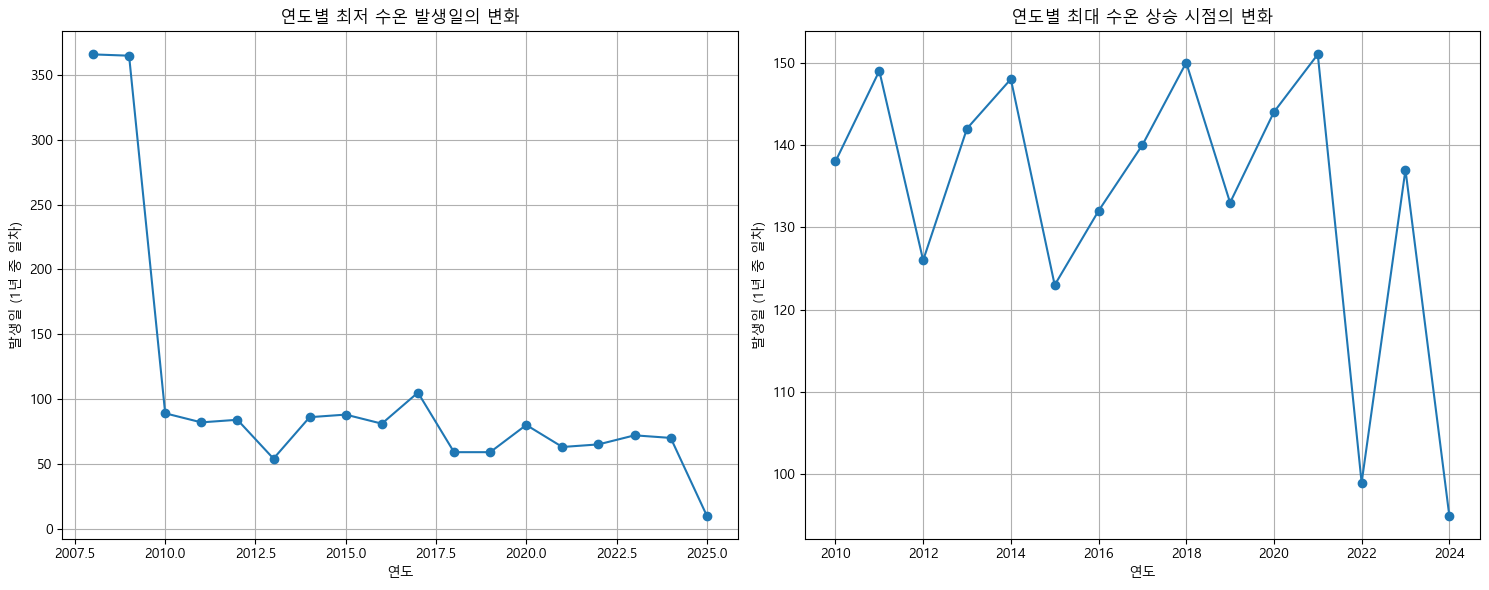


최저 수온 발생일 추세:
연간 변화율: -11.44일/년 (p-value: 0.0052)


In [5]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('data/마라도_수온_2008부터.csv', encoding='utf-8')
df['일시'] = pd.to_datetime(df['일시'])
df = df.sort_values('일시')

# 연도별 분석
years = df['일시'].dt.year.unique()
cycle_starts = []

for year in years:
    # 해당 연도의 데이터 추출 (전후 1개월 포함)
    year_start = pd.Timestamp(f'{year-1}-12-01')
    year_end = pd.Timestamp(f'{year+1}-01-31')
    mask = (df['일시'] >= year_start) & (df['일시'] <= year_end)
    year_data = df[mask].copy()
    
    # 7일 이동평균으로 노이즈 제거
    year_data['평균수온_smooth'] = year_data['평균수온(섭씨)'].rolling(window=7, center=True).mean()
    
    # 변화율 계산 (차분)
    year_data['변화율'] = year_data['평균수온_smooth'].diff()
    
    # 해당 연도 데이터만 선택
    year_mask = year_data['일시'].dt.year == year
    year_data = year_data[year_mask]
    
    if not year_data.empty:
        # 1. 최저 수온 시점
        min_temp_date = year_data.loc[year_data['평균수온_smooth'].idxmin(), '일시']
        
        # 2. 변화율이 가장 큰 시점 (봄철 상승 구간)
        spring_mask = (year_data['일시'].dt.month.isin([2, 3, 4, 5]))
        if not year_data[spring_mask].empty:
            max_change_date = year_data.loc[year_data[spring_mask]['변화율'].idxmax(), '일시']
        else:
            max_change_date = pd.NaT
        
        cycle_starts.append({
            'year': year,
            'min_temp_date': min_temp_date,
            'max_change_date': max_change_date,
            'min_temp': year_data.loc[year_data['평균수온_smooth'].idxmin(), '평균수온_smooth'],
            'max_change_rate': year_data.loc[year_data[spring_mask]['변화율'].idxmax(), '변화율'] if not year_data[spring_mask].empty else None
        })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(cycle_starts)

# 결과 출력
print("\n연도별 주기 시작점:")
for _, row in results_df.iterrows():
    print(f"\n{row['year']}년:")
    print(f"  최저 수온 발생일: {row['min_temp_date'].strftime('%m월 %d일')} ({row['min_temp']:.1f}°C)")
    if pd.notna(row['max_change_date']):
        print(f"  최대 상승 시점: {row['max_change_date'].strftime('%m월 %d일')} (변화율: {row['max_change_rate']:.3f}°C/일)")

# 시각화
plt.figure(figsize=(15, 6))

# 최저 수온 발생일의 변화
plt.subplot(1, 2, 1)
plt.plot(results_df['year'], results_df['min_temp_date'].dt.dayofyear, 'o-')
plt.title('연도별 최저 수온 발생일의 변화')
plt.xlabel('연도')
plt.ylabel('발생일 (1년 중 일차)')
plt.grid(True)

# 최대 상승 시점의 변화
plt.subplot(1, 2, 2)
plt.plot(results_df['year'], results_df['max_change_date'].dt.dayofyear, 'o-')
plt.title('연도별 최대 수온 상승 시점의 변화')
plt.xlabel('연도')
plt.ylabel('발생일 (1년 중 일차)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 추세 분석
from scipy import stats

# 최저 수온 발생일의 추세
slope, intercept, r_value, p_value, std_err = stats.linregress(
    results_df['year'], 
    results_df['min_temp_date'].dt.dayofyear
)

print(f"\n최저 수온 발생일 추세:")
print(f"연간 변화율: {slope:.2f}일/년 (p-value: {p_value:.4f})")

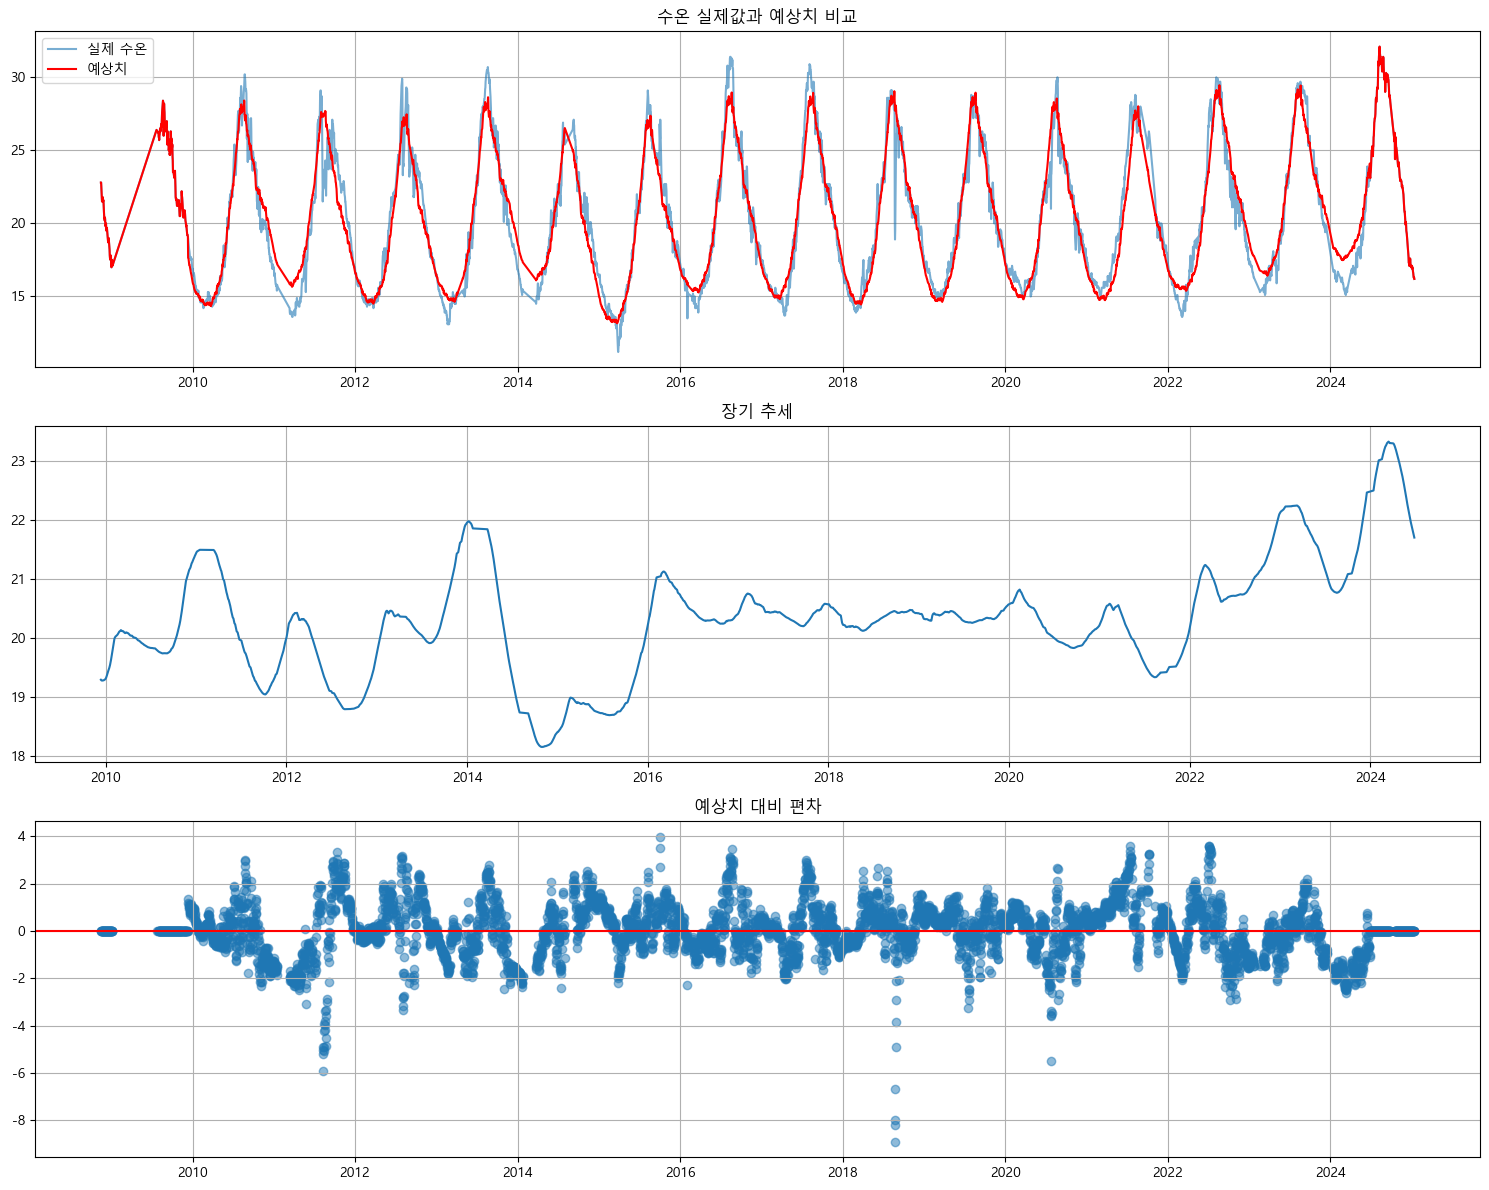


편차 통계:
평균 절대 편차: 0.84℃
최대 양의 편차: 3.99℃
최대 음의 편차: -8.93℃


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
df = pd.read_csv('data/마라도_수온_2008부터.csv', encoding='utf-8')
df['일시'] = pd.to_datetime(df['일시'])
df = df.sort_values('일시')

# 1. 트렌드 계산 (1년 이동 평균)
df['trend'] = df['평균수온(섭씨)'].rolling(window=365, center=True).mean()

# 2. 계절성 계산
df['doy'] = df['일시'].dt.dayofyear
df['year'] = df['일시'].dt.year

# 최근 3년의 계절성 가중치 계산
max_year = df['year'].max()
df['weight'] = np.where(df['year'] >= max_year-3, 2, 1)

# 일자별 가중 평균 계절성 계산
seasonal_pattern = df.groupby('doy').agg({
    '평균수온(섭씨)': 'mean'
}).reset_index()

# 3. 예상치 계산
df = df.merge(seasonal_pattern, on='doy', suffixes=('', '_seasonal'))
df['expected'] = df['trend'] + (df['평균수온(섭씨)_seasonal'] - df['평균수온(섭씨)_seasonal'].mean())

# 결측치 처리
df['expected'] = df['expected'].fillna(df['평균수온(섭씨)'])

# 편차 계산
df['deviation'] = df['평균수온(섭씨)'] - df['expected']

# 시각화
plt.figure(figsize=(15, 12))

# 1. 실제값과 예상치 비교
plt.subplot(3, 1, 1)
plt.plot(df['일시'], df['평균수온(섭씨)'], label='실제 수온', alpha=0.6)
plt.plot(df['일시'], df['expected'], label='예상치', color='red')
plt.title('수온 실제값과 예상치 비교')
plt.legend()
plt.grid(True)

# 2. 트렌드
plt.subplot(3, 1, 2)
plt.plot(df['일시'], df['trend'])
plt.title('장기 추세')
plt.grid(True)

# 3. 편차
plt.subplot(3, 1, 3)
plt.scatter(df['일시'], df['deviation'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('예상치 대비 편차')
plt.grid(True)

plt.tight_layout()
plt.show()

# 통계 출력
print("\n편차 통계:")
print(f"평균 절대 편차: {abs(df['deviation']).mean():.2f}℃")
print(f"최대 양의 편차: {df['deviation'].max():.2f}℃")
print(f"최대 음의 편차: {df['deviation'].min():.2f}℃")

C:\Users\user\AppData\Local\Temp\ipykernel_9264\3028900503.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_pattern = df.groupby('doy').apply(


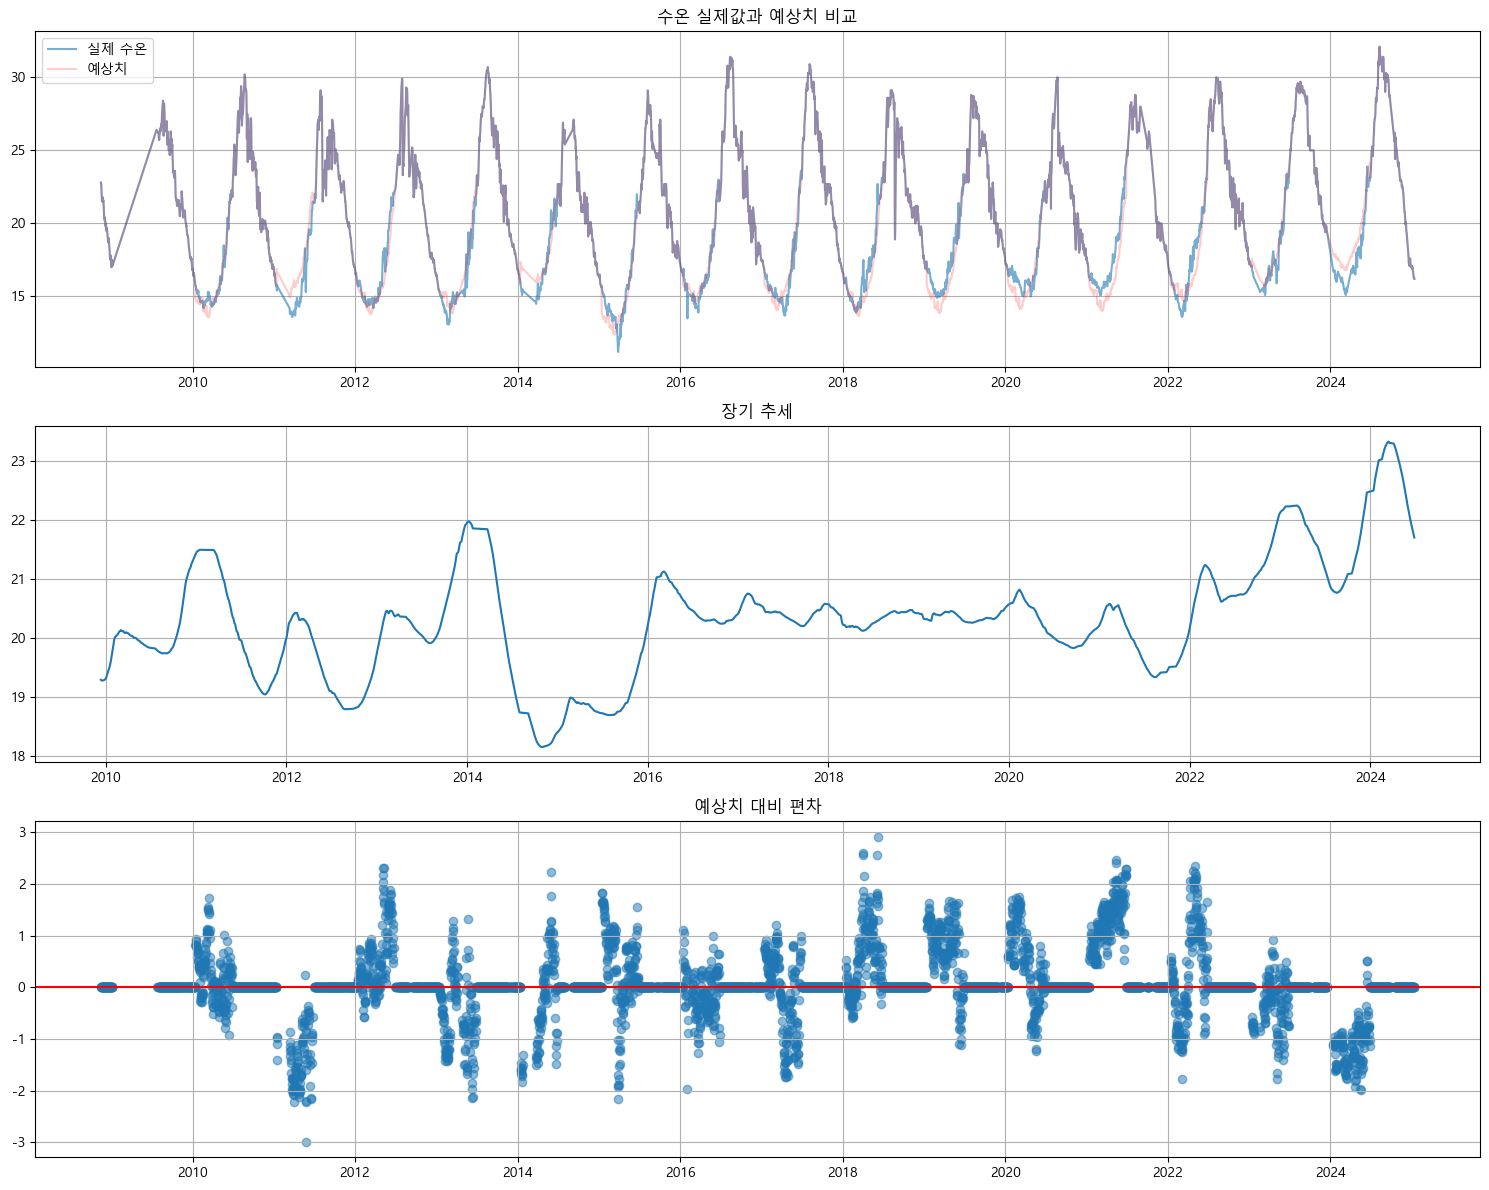


편차 통계:
평균 절대 편차: 0.34℃
최대 양의 편차: 2.92℃
최대 음의 편차: -2.99℃


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
df = pd.read_csv('data/마라도_수온_2008부터.csv', encoding='utf-8')
df['일시'] = pd.to_datetime(df['일시'])
df = df.sort_values('일시')

# 1. 트렌드 계산 (1년 이동 평균)
df['trend'] = df['평균수온(섭씨)'].rolling(window=365, center=True).mean()

# 2. 계절성 계산 - 최근 연도에 더 큰 가중치 부여
df['doy'] = df['일시'].dt.dayofyear
df['year'] = df['일시'].dt.year
max_year = df['year'].max()

# 연도별 가중치 설정 (최근 연도일수록 더 큰 가중치)
df['weight'] = (df['year'] - df['year'].min() + 1) / (max_year - df['year'].min() + 1)
df.loc[df['year'] >= max_year-2, 'weight'] *= 2  # 최근 2년 가중치 2배 증가

# 일자별 가중 평균 계절성 계산
seasonal_pattern = df.groupby('doy').apply(
    lambda x: np.average(x['평균수온(섭씨)'] - x['trend'], weights=x['weight'])
).reset_index()
seasonal_pattern.columns = ['doy', 'seasonal']

# 3. 예상치 계산
df = df.merge(seasonal_pattern, on='doy')
df['expected'] = df['trend'] + df['seasonal']

# 결측치 처리
df['expected'] = df['expected'].fillna(df['평균수온(섭씨)'])

# 편차 계산
df['deviation'] = df['평균수온(섭씨)'] - df['expected']

# 시각화
plt.figure(figsize=(15, 12))

# 1. 실제값과 예상치 비교
plt.subplot(3, 1, 1)
plt.plot(df['일시'], df['평균수온(섭씨)'], label='실제 수온', alpha=0.6)
plt.plot(df['일시'], df['expected'], label='예상치', color='red', alpha=0.2)
plt.title('수온 실제값과 예상치 비교')
plt.legend()
plt.grid(True)

# 2. 트렌드
plt.subplot(3, 1, 2)
plt.plot(df['일시'], df['trend'])
plt.title('장기 추세')
plt.grid(True)

# 3. 편차
plt.subplot(3, 1, 3)
plt.scatter(df['일시'], df['deviation'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('예상치 대비 편차')
plt.grid(True)

plt.tight_layout()
plt.show()

# 통계 출력
print("\n편차 통계:")
print(f"평균 절대 편차: {abs(df['deviation']).mean():.2f}℃")
print(f"최대 양의 편차: {df['deviation'].max():.2f}℃")
print(f"최대 음의 편차: {df['deviation'].min():.2f}℃")


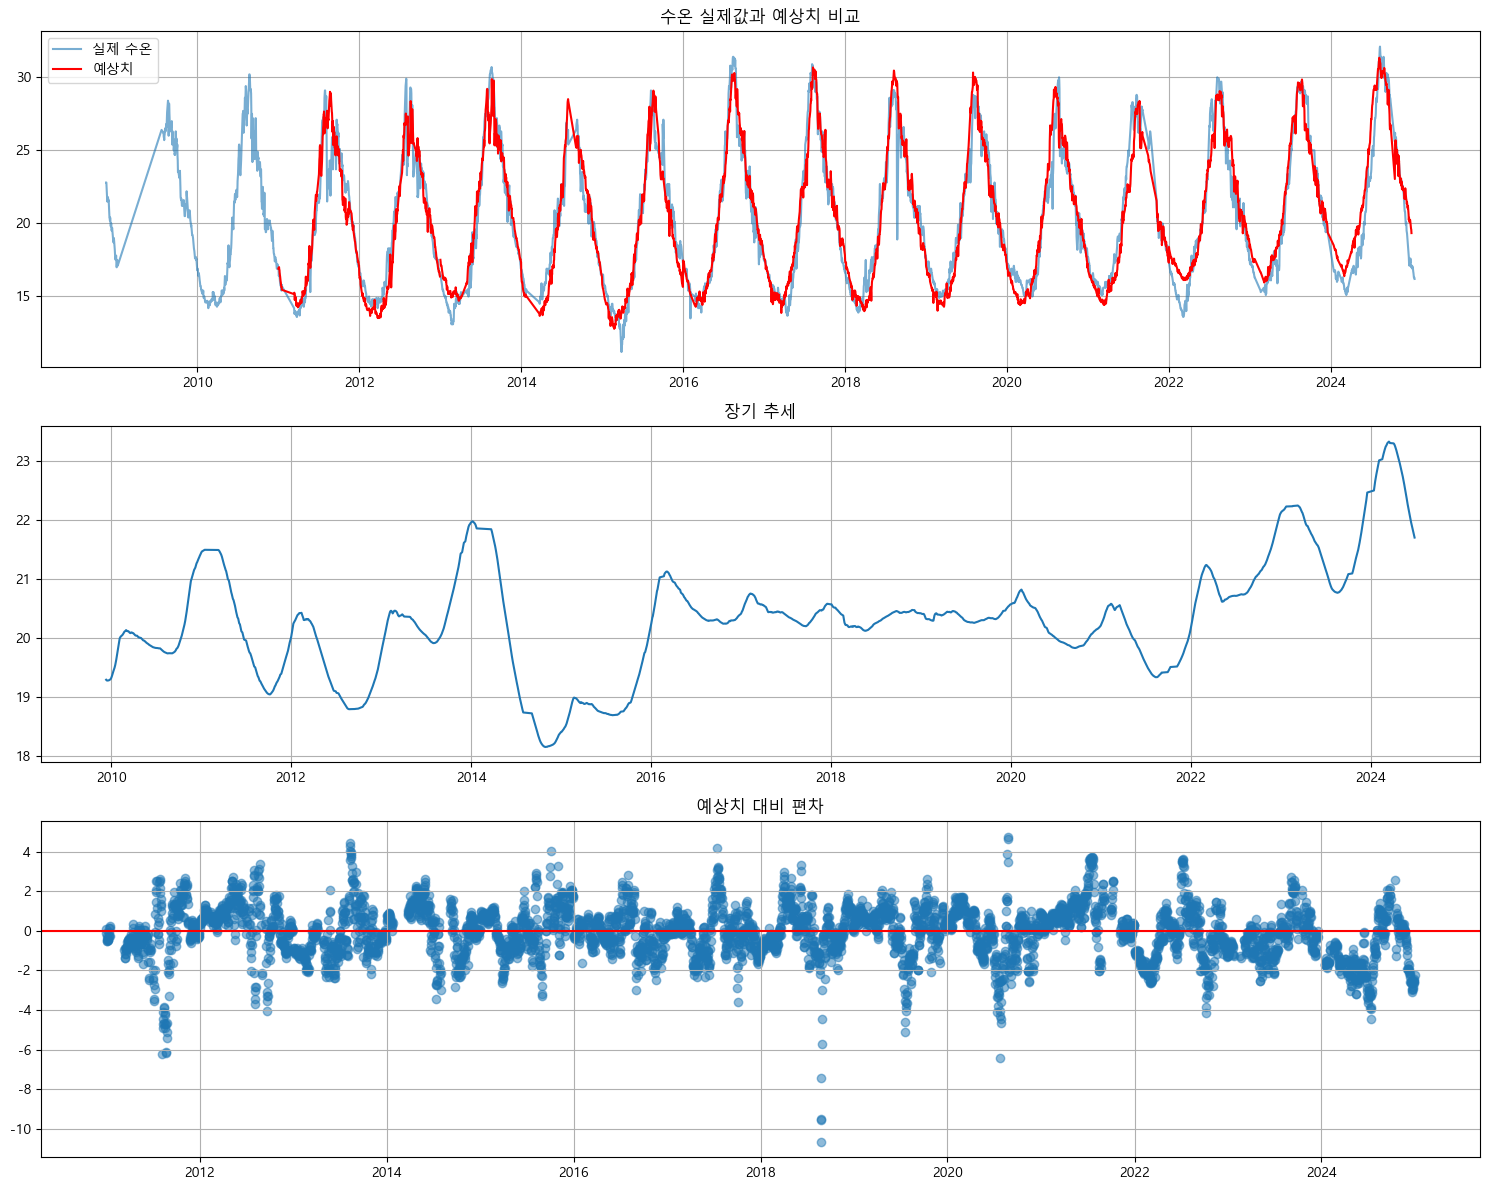


편차 통계:
평균 절대 편차: 1.02℃
최대 양의 편차: 4.76℃
최대 음의 편차: -10.66℃
저장 완료! 파일명: 마라도_수온_예측_편차.csv

데이터 기간:
시작일: 2011-01-01 00:00:00
종료일: 2024-12-30 00:00:00
총 데이터 수: 4605개

데이터 미리보기:
            날짜  실제수온       예상수온        편차
566 2011-01-01  17.0  16.907546  0.092454
567 2011-01-02  16.8  16.907546 -0.107546
568 2011-01-03  16.4  16.907546 -0.507546
569 2011-01-04  16.5  17.007546 -0.507546
570 2011-01-05  16.6  16.857546 -0.257546


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
df = pd.read_csv('data/마라도_수온_2008부터.csv', encoding='utf-8')
df['일시'] = pd.to_datetime(df['일시'])
df = df.sort_values('일시')

# 1. 트렌드 계산 (1년 이동 평균)
df['trend'] = df['평균수온(섭씨)'].rolling(window=365, center=True).mean()

# 2. 연도별로 분리하여 계절성 계산
df['year'] = df['일시'].dt.year
df['doy'] = df['일시'].dt.dayofyear

def calculate_expected_temp(data, target_year):
   # 목표 연도 이전의 데이터만 사용
   past_data = data[data['year'] < target_year].copy()
   
   if past_data.empty:
       return None
       
   # 최근 3년간의 계절성 패턴 계산
   recent_years = past_data['year'].unique()[-3:]
   past_data = past_data[past_data['year'].isin(recent_years)]
   
   # 일자별 평균 계절성 계산
   seasonal_pattern = past_data.groupby('doy')['평균수온(섭씨)'].mean()
   
   # 현재 연도 데이터에 적용
   current_year = data[data['year'] == target_year].copy()
   current_year['expected'] = current_year['doy'].map(seasonal_pattern)
   
   # 트렌드 조정
   trend_diff = current_year['trend'].mean() - past_data['trend'].mean()
   current_year['expected'] += trend_diff
   
   return current_year[['일시', 'expected']]

# 각 연도별로 예측 수행
predictions = []
for year in df['year'].unique():
   if year > df['year'].min() + 2:  # 최소 3년의 데이터가 필요
       pred = calculate_expected_temp(df, year)
       if pred is not None:
           predictions.append(pred)

# 예측 결과 합치기
predictions_df = pd.concat(predictions)
df = df.merge(predictions_df[['일시', 'expected']], on='일시', how='left')

# 편차 계산
df['deviation'] = df['평균수온(섭씨)'] - df['expected']

# 시각화
plt.figure(figsize=(15, 12))

# 1. 실제값과 예상치 비교
plt.subplot(3, 1, 1)
plt.plot(df['일시'], df['평균수온(섭씨)'], label='실제 수온', alpha=0.6)
plt.plot(df['일시'], df['expected'], label='예상치', color='red')
plt.title('수온 실제값과 예상치 비교')
plt.legend()
plt.grid(True)

# 2. 트렌드
plt.subplot(3, 1, 2)
plt.plot(df['일시'], df['trend'])
plt.title('장기 추세')
plt.grid(True)

# 3. 편차
plt.subplot(3, 1, 3)
plt.scatter(df['일시'], df['deviation'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('예상치 대비 편차')
plt.grid(True)

plt.tight_layout()
plt.show()

# 통계 출력
print("\n편차 통계:")
print(f"평균 절대 편차: {abs(df['deviation']).dropna().mean():.2f}℃")
print(f"최대 양의 편차: {df['deviation'].dropna().max():.2f}℃")
print(f"최대 음의 편차: {df['deviation'].dropna().min():.2f}℃")

# 결과 데이터프레임 정리 (결측치 제거)
result_df = df[['일시', '평균수온(섭씨)', 'expected', 'deviation']].copy()
result_df = result_df.dropna()  # 결측치가 있는 행 제거
result_df.columns = ['날짜', '실제수온', '예상수온', '편차']

# CSV 파일로 저장
result_df.to_csv('마라도_수온_예측_편차.csv', index=False, encoding='utf-8-sig')

print("저장 완료! 파일명: 마라도_수온_예측_편차.csv")
print("\n데이터 기간:")
print(f"시작일: {result_df['날짜'].min()}")
print(f"종료일: {result_df['날짜'].max()}")
print(f"총 데이터 수: {len(result_df)}개")
print("\n데이터 미리보기:")
print(result_df.head())